<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left               

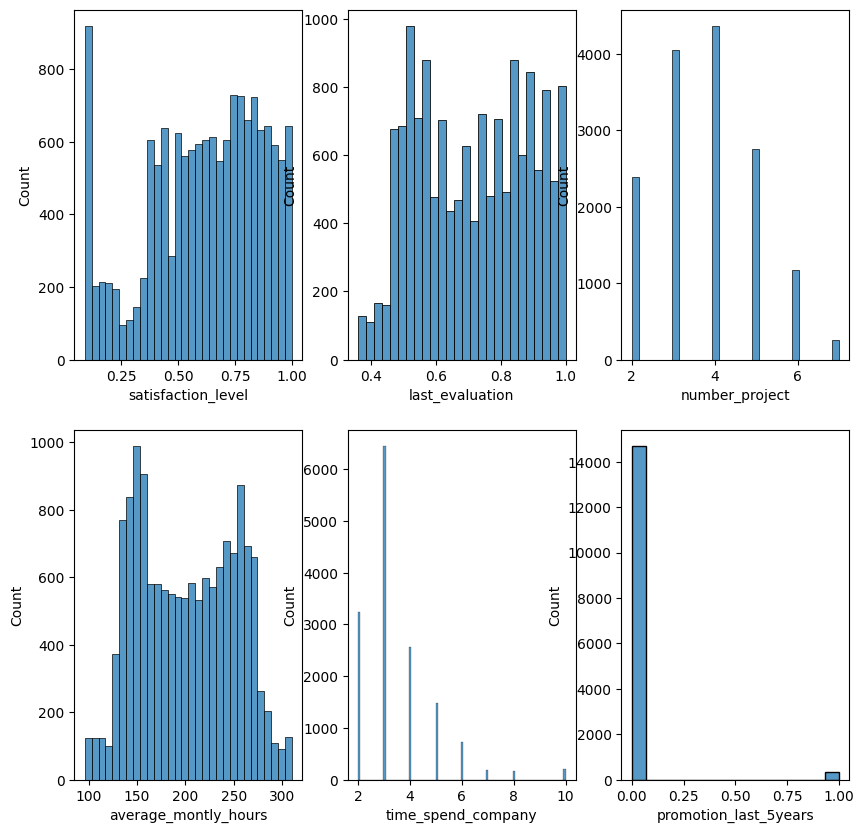

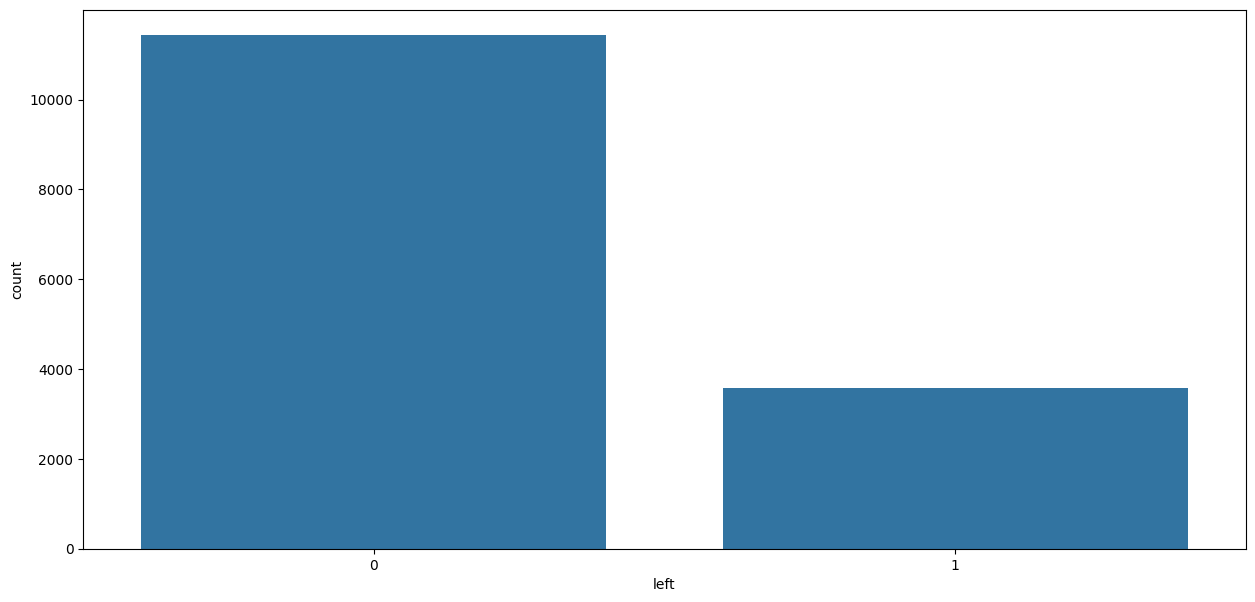

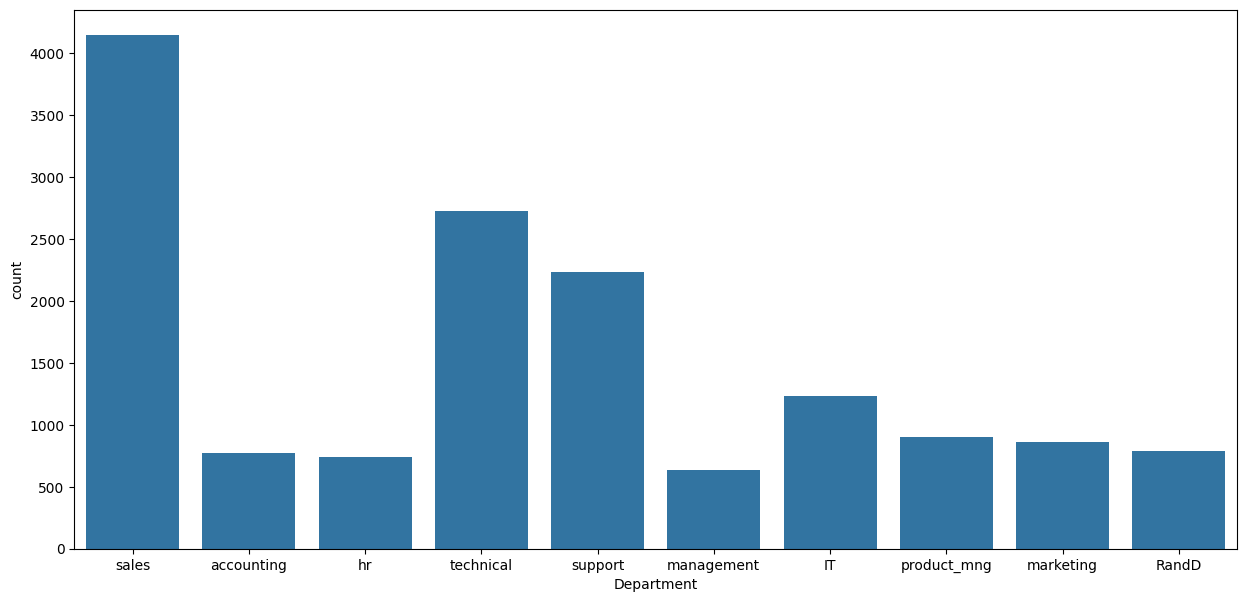

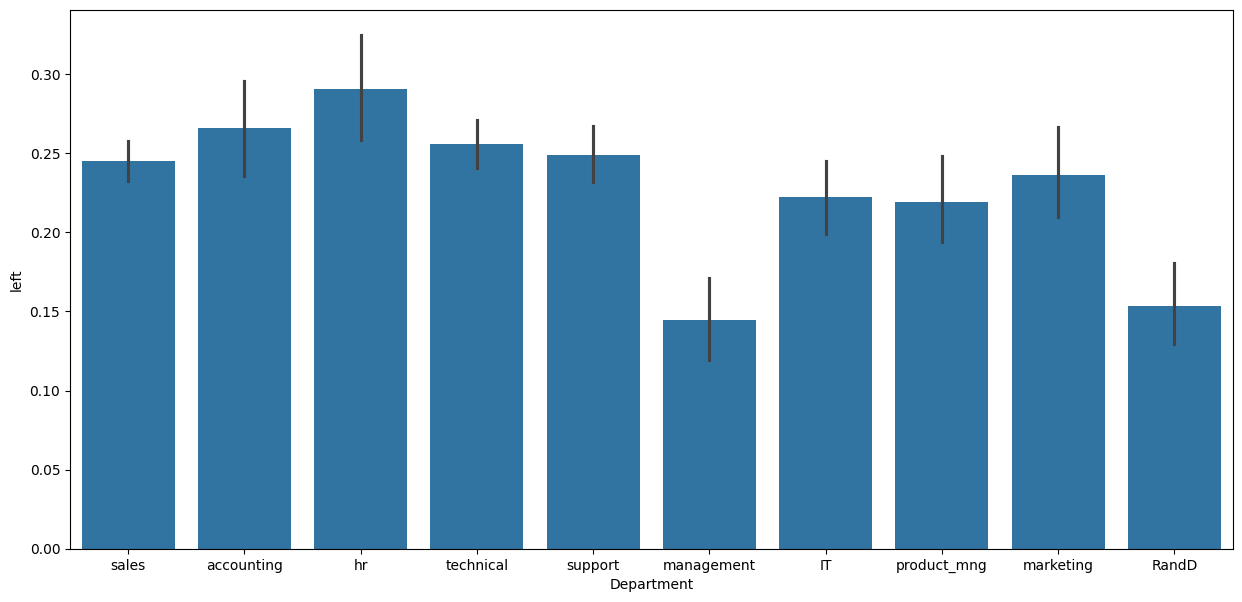

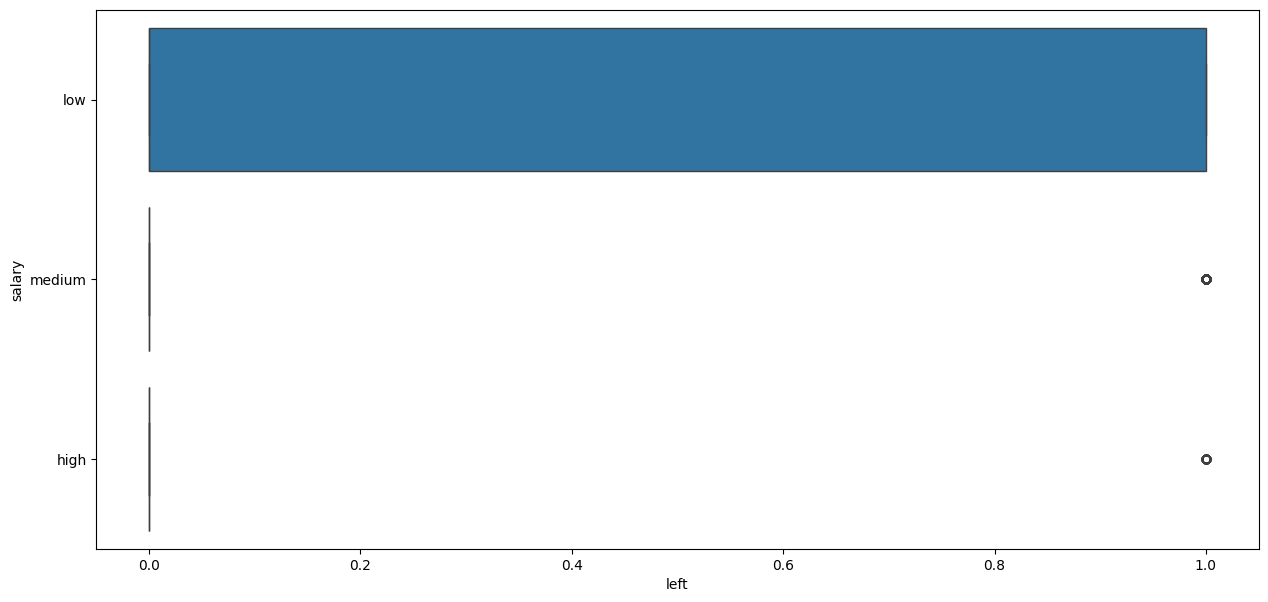

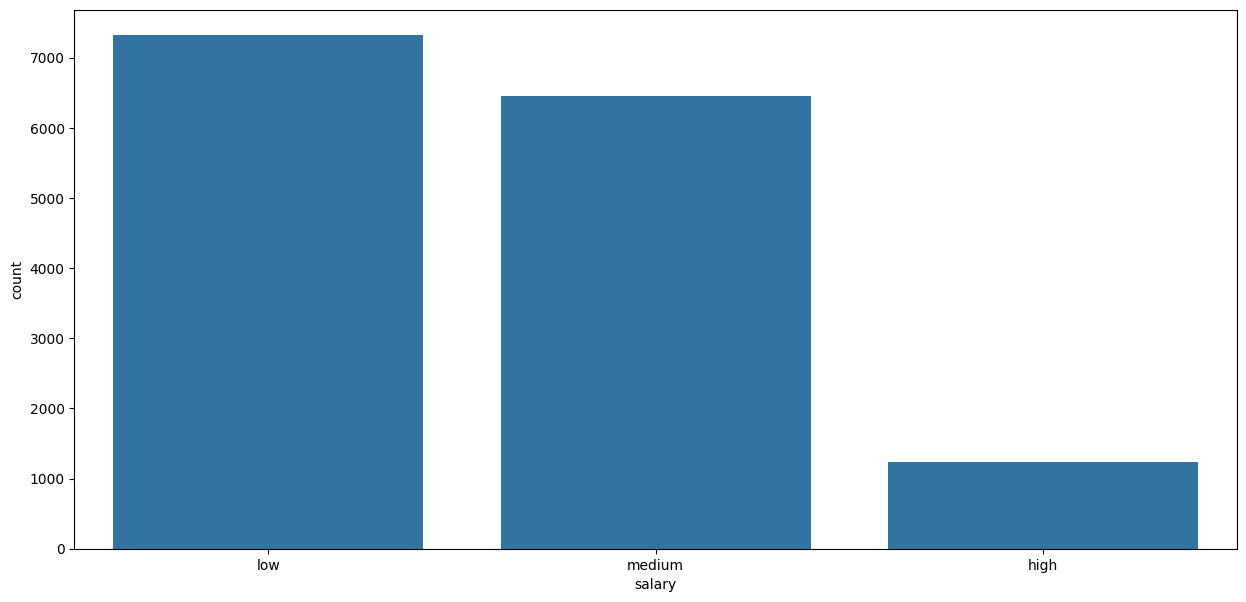

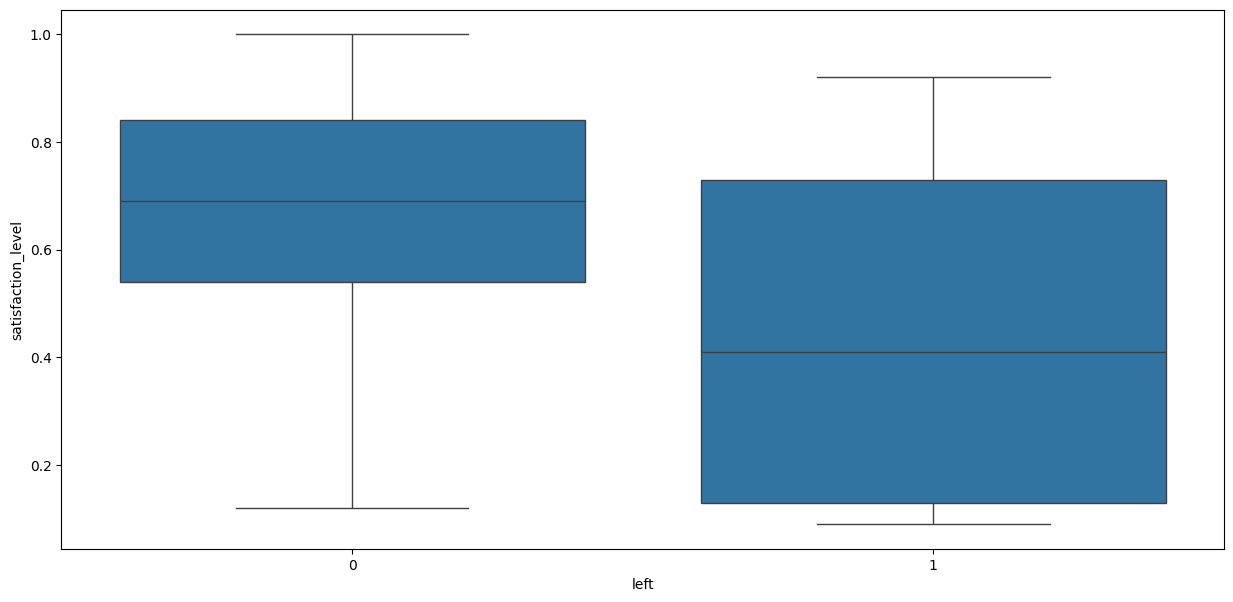

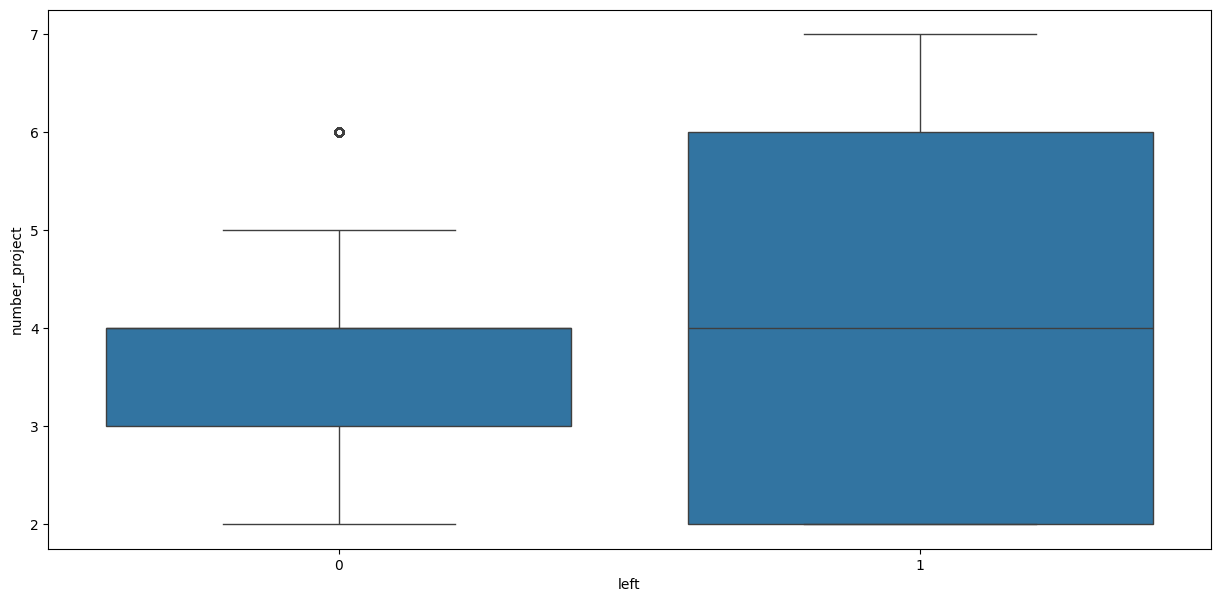

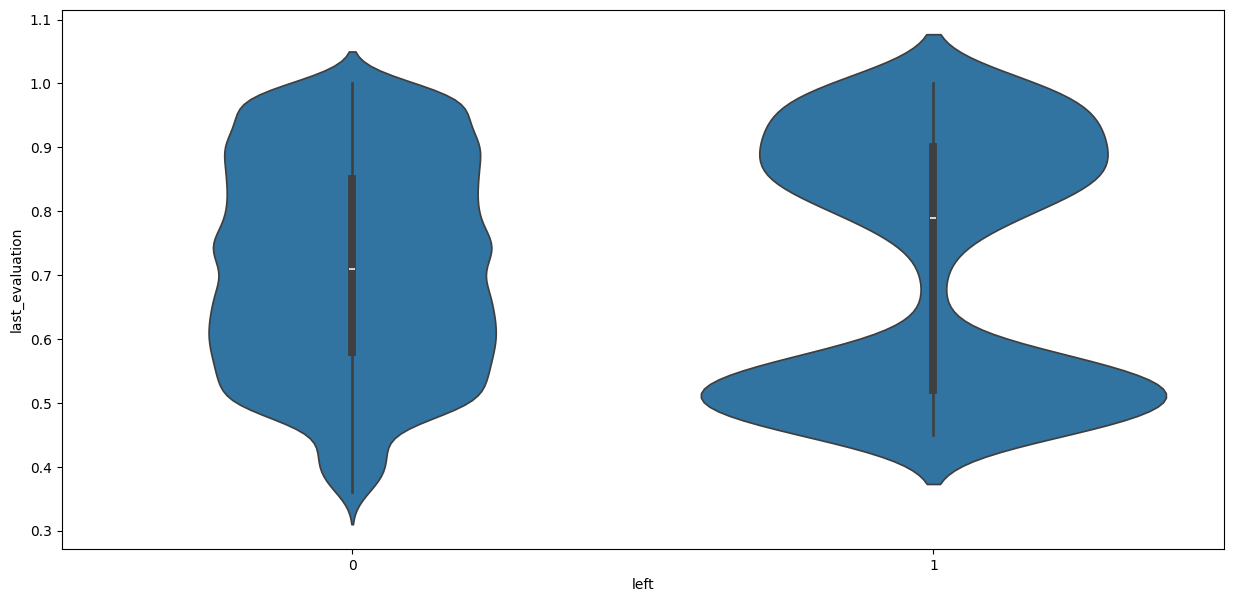

      IT  RandD  accounting     hr  management  marketing  product_mng  sales  \
0  False  False       False  False       False      False        False   True   
1  False  False       False  False       False      False        False   True   
2  False  False       False  False       False      False        False   True   
3  False  False       False  False       False      False        False   True   
4  False  False       False  False       False      False        False   True   

   support  technical  
0    False      False  
1    False      False  
2    False      False  
3    False      False  
4    False      False  
left
0    11428
1     3571
Name: count, dtype: int64
left
0    76.191746
1    23.808254
Name: count, dtype: float64


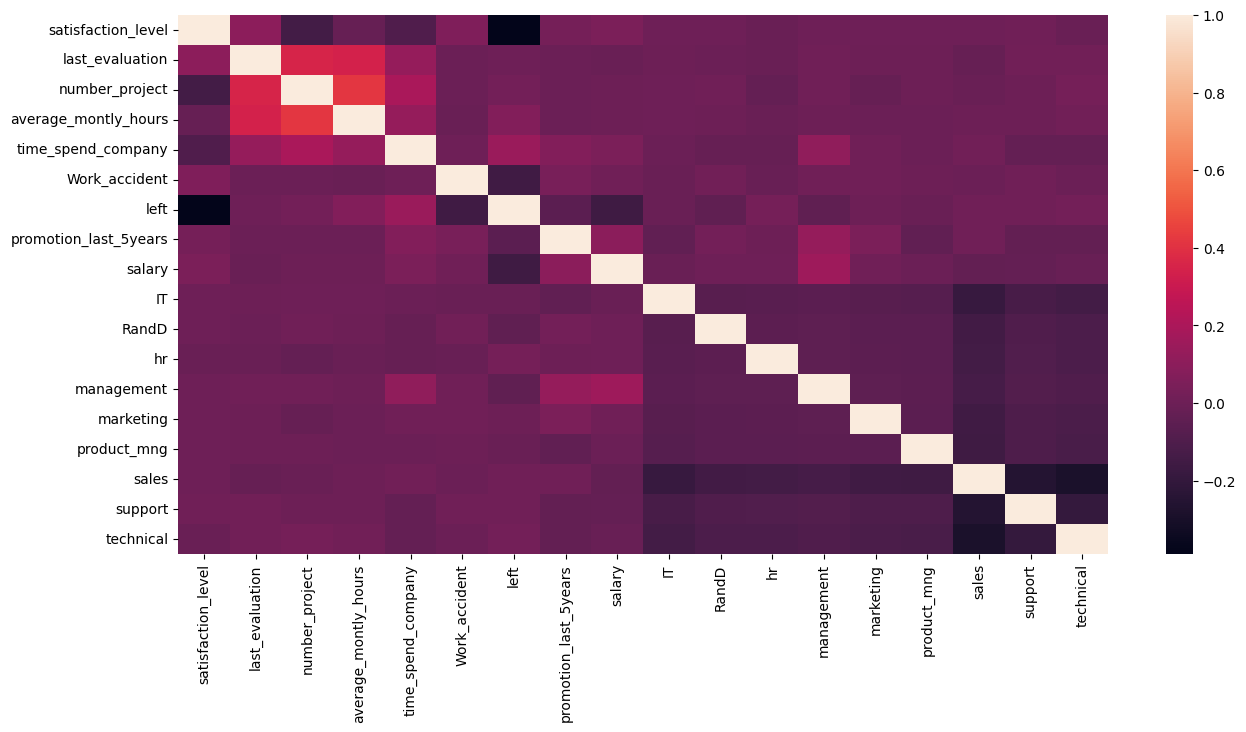

Training Accuracy: 100.00%
Test Accuracy: 97.23%
Training Accuracy (depth=5): 97.72%
Test Accuracy (depth=5): 97.07%
Training Accuracy (min_samples_leaf=100): 96.58%
Test Accuracy (min_samples_leaf=100): 96.13%
Precision Score: 0.92
Recall Score: 0.96


In [11]:
import pandas as pd  # Data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import export_graphviz
import os

# Make sure the path to your dataset is correct
file_path = "/content/HR_comma_sep.csv"

if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    df = pd.read_csv(file_path)
    df.head(5)
    df.info()
    print(df.isnull().any())

    df.Department.unique()
    df.salary.unique()

    fig, ax = plt.subplots(2, 3, figsize=(10, 10))
    sns.histplot(df['satisfaction_level'], ax=ax[0, 0])
    sns.histplot(df['last_evaluation'], ax=ax[0, 1])
    sns.histplot(df['number_project'], ax=ax[0, 2])
    sns.histplot(df['average_montly_hours'], ax=ax[1, 0])
    sns.histplot(df['time_spend_company'], ax=ax[1, 1])
    sns.histplot(df['promotion_last_5years'], ax=ax[1, 2])
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.countplot(x='left', data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.countplot(x='Department', data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.barplot(x='Department', y='left', data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.boxplot(x='left', y='salary', data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.countplot(x='salary', data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.boxplot(x="left", y="satisfaction_level", data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.boxplot(x="left", y="number_project", data=df)
    plt.show()

    fig = plt.figure(figsize=(15, 7))
    sns.violinplot(x="left", y="last_evaluation", data=df)
    plt.show()

    df.salary = df.salary.astype('category')
    df.salary = df.salary.cat.reorder_categories(['low', 'medium', 'high'])
    df.salary = df.salary.cat.codes

    departments = pd.get_dummies(df.Department)
    print(departments.head(5))
    departments = departments.drop("accounting", axis=1)
    df = df.drop("Department", axis=1)
    df = df.join(departments)

    df.head(5)
    n_employees = len(df)

    print(df.left.value_counts())
    print(df.left.value_counts() / n_employees * 100)

    fig = plt.figure(figsize=(15, 7))
    cor_mat = df.corr()
    sns.heatmap(cor_mat)
    plt.show()

    target = df['left']
    features = df.drop('left', axis=1)

    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(features_train, target_train)
    print(f'Training Accuracy: {model.score(features_train, target_train) * 100:.2f}%')
    print(f'Test Accuracy: {model.score(features_test, target_test) * 100:.2f}%')

    from IPython.display import Image as PImage
    from subprocess import check_call
    from PIL import Image, ImageDraw, ImageFont

    export_graphviz(model, "tree.dot")
    check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

    img = Image.open("tree.png")
    draw = ImageDraw.Draw(img)
    img.save('sample-out.png')
    PImage("sample-out.png", height=2000, width=1900)

    model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
    model_depth_5.fit(features_train, target_train)
    print(f'Training Accuracy (depth=5): {model_depth_5.score(features_train, target_train) * 100:.2f}%')
    print(f'Test Accuracy (depth=5): {model_depth_5.score(features_test, target_test) * 100:.2f}%')

    model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
    model_sample_100.fit(features_train, target_train)
    print(f'Training Accuracy (min_samples_leaf=100): {model_sample_100.score(features_train, target_train) * 100:.2f}%')
    print(f'Test Accuracy (min_samples_leaf=100): {model_sample_100.score(features_test, target_test) * 100:.2f}%')

    prediction = model.predict(features_test)
    print(f'Precision Score: {precision_score(target_test, prediction):.2f}')
    print(f'Recall Score: {recall_score(target_test, prediction):.2f}')
